# State of Data Brazil 2022 | Kaggle

## Objetivo

Quais fatores tornam um profissional da área de dados satisfeito

## Metodologia

Usarei a base de dados disponibilizada no desafio State of Data 2022

### Configuração inicial

In [1]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Configurando Pandas para exibir todas as colunas (são muitas colunas)
pd.set_option('display.max_columns', None)

#Revertendo a configuração
#pd.reset_option('display.max_columns')

In [3]:
#Carregamento do Dataset

data = pd.read_csv('data/State_of_data_2022.csv')

In [4]:
#Melhorando a leitura das colunas

data.columns = [coluna.strip("()").replace("'", "").replace(", ", "_") for coluna in data.columns]

In [5]:
#Testando o novo modo de leitura das colunas
data.head()

,P0_id,P1_a _Idade,P1_a_1 _Faixa idade,P1_b _Genero,P1_c _Cor/raca/etnia,P1_d _PCD,P1_e _experiencia_profissional_prejudicada,P1_f _aspectos_prejudicados,P1_g _vive_no_brasil,P1_i _Estado onde mora,P1_i_1 _uf onde mora,P1_i_2 _Regiao onde mora,P1_j _Mudou de Estado?,P1_k _Regiao de origem,P1_l _Nivel de Ensino,P1_m _Área de Formação,P2_a _Qual sua situação atual de trabalho?,P2_b _Setor,P2_c _Numero de Funcionarios,P2_d _Gestor?,P2_e _Cargo como Gestor,P2_f _Cargo Atual,P2_g _Nivel,P2_h _Faixa salarial,P2_i _Quanto tempo de experiência na área de dados você tem?,P2_j _Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,P2_k _Você está satisfeito na sua empresa atual?,P2_l _Qual o principal motivo da sua insatisfação com a empresa atual?,P2_l_1 _Falta de oportunidade de crescimento no emprego atual,P2_l_2 _Salário atual não corresponde ao mercado,P2_l_3 _Não tenho uma boa relação com meu líder/gestor,P2_l_4 _Gostaria de trabalhar em em outra área de atuação,P2_l_5 _Gostaria de receber mais benefícios,P2_l_6 _O clima de trabalho/ambiente não é bom,P2_l_7 _Falta de maturidade analítica na empresa,P2_m _Você participou de entrevistas de emprego nos últimos 6 meses?,P2_n _Você pretende mudar de emprego nos próximos 6 meses?,P2_o _Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,P2_o_1 _Remuneração/Salário,P2_o_2 _Benefícios,P2_o_3 _Propósito do trabalho e da empresa,P2_o_4 _Flexibilidade de trabalho remoto,P2_o_5 _Ambiente e clima de trabalho,P2_o_6 _Oportunidade de aprendizado e trabalhar com referências na área,P2_o_7 _Plano de carreira e oportunidades de crescimento profissional,P2_o_8 _Maturidade da empresa em termos de tecnologia e dados,P2_o_9 _Qualidade dos gestores e líderes,P2_o_10 _Reputação que a empresa tem no mercado,P2_p _Atualmente qual a sua forma de trabalho?,P2_q _Qual a forma de trabalho ideal para você?,P2_r _Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,P2_s _Sua empresa passu por Layoff em 2022?,P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,P3_b _Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,P3_b_1 _Analytics Engineer,P3_b_2 _Engenharia de Dados/Data Engineer,P3_b_3 _Analista de Dados/Data Analyst,P3_b_4 _Cientista de Dados/Data Scientist,P3_b_5 _Database Administrator/DBA,P3_b_6 _Analista de Business Intelligence/BI,P3_b_7 _Arquiteto de Dados/Data Architect,P3_b_8 _Data Product Manager/DPM,P3_b_9 _Business Analyst,P3_c _Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,P3_c_1 _Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,P3_c_2 _Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,P3_c_3 _Atração_seleção e contratação de talentos para o time de dados.,P3_c_4 _Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,P3_c_5 _Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados_garantindo a qualidade e confiabilidade da informação.,P3_c_6 _Sou gestor da equipe responsável pela entrega de dados_estudos_relatórios e dashboards para as áreas de negócio da empresa.,P3_c_7 _Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,P3_c_8 _Apesar de ser gestor ainda atuo na parte técnica_construindo soluções/análises/modelos etc.,P3_c_9 _Gestão de projetos de dados_cuidando das etapas_equipes envolvidas_atingimento dos objetivos etc.,P3_c_10 _Gestão de produtos de dados_cuidando da visão dos produtos_backlog_feedback de usuários etc.,P3_c_11 _Gestão de pessoas_apoio no desenvolvimento das pessoas_evolução de carreira,P3_d _Quais são os 3 maiores desafios que você tem como gestor no atual momento?,P3_d

In [6]:
#Acessando o id dos usuários pesquisados para criar novos datasets, separando todas as 8 partes da pesquisa
#Deixando-as vinculadas ao id

coluna_principal = data.iloc[:,0]

### Trabalhando os dados de análise de conhecimento

In [7]:
#Separando todas as perguntas da parte 4 em um novo dataset para análise de conhecimento

colunas_p4 = [coluna for coluna in data.columns if coluna.startswith('P4')]

data_parte4 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p4], axis=1)

In [8]:
data_parte4.head()

,P0_id,P4_a _Mesmo que esse não seja seu cargo formal_você considera que sua atuação no dia a dia_reflete alguma das opções listadas abaixo?,P4_a_1 _Atuacao,P4_b _Quais das fontes de dados listadas você já analisou ou processou no trabalho?,P4_b_1 _Dados relacionais (estruturados em bancos SQL),P4_b_2 _Dados armazenados em bancos NoSQL,P4_b_3 _Imagens,P4_b_4 _Textos/Documentos,P4_b_5 _Vídeos,P4_b_6 _Áudios,P4_b_7 _Planilhas,P4_b_8 _Dados georeferenciados,P4_c _Entre as fontes de dados listadas_quais você utiliza na maior parte do tempo?,P4_c_1 _Dados relacionais (estruturados em bancos SQL),P4_c_2 _Dados armazenados em bancos NoSQL,P4_c_3 _Imagens,P4_c_4 _Textos/Documentos,P4_c_5 _Vídeos,P4_c_6 _Áudios,P4_c_7 _Planilhas,P4_c_8 _Dados georeferenciados,P4_d _Quais das linguagens listadas abaixo você utiliza no trabalho?,P4_d_1 _SQL,P4_d_2 _R,P4_d_3 _Python,P4_d_4 _C/C++/C#,P4_d_5 _.NET,P4_d_6 _Java,P4_d_7 _Julia,P4_d_8 _SAS/Stata,P4_d_9 _Visual Basic/VBA,P4_d_10 _Scala,P4_d_11 _Matlab,P4_d_12 _PHP,P4_d_13 _Javascript,P4_d_14 _Não utilizo nenhuma linguagem,P4_e _Entre as linguagens listadas abaixo_qual é a que você mais utiliza no trabalho?,P4_f _Entre as linguagens listadas abaixo_qual é a sua preferida?,P4_g _Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?,P4_g_1 _MySQL,P4_g_2 _Oracle,P4_g_3 _SQL SERVER,P4_f_4 _Amazon Aurora ou RDS,P4_f_5 _DynamoDB,P4_f_6 _CoachDB,P4_f_7 _Cassandra,P4_f_8 _MongoDB,P4_f_9 _MariaDB,P4_f_10 _Datomic,P4_f_11 _S3,P4_f_12 _PostgreSQL,P4_f_13 _ElasticSearch,P4_f_14 _DB2,P4_f_15 _Microsoft Access,P4_f_16 _SQLite,P4_f_17 _Sybase,P4_f_18 _Firebase,P4_f_19 _Vertica,P4_f_20 _Redis,P4_f_21 _Neo4J,P4_f_22 _Google BigQuery,P4_f_23 _Google Firestore,P4_f_24 _Amazon Redshift,P4_f_25 _Amazon Athena,P4_f_26 _Snowflake,P4_f_27 _Databricks,P4_f_28 _HBase,P4_f_29 _Presto,P4_f_30 _Splunk,P4_f_31 _SAP HANA,P4_f_32 _Hive,P4_f_33 _Firebird,P4_g _Quais das opções de Cloud listadas abaixo você utiliza no trabalho?,P4_h _Dentre as opções listadas_qual sua Cloud preferida?,P4_h_1 _Azure (Microsoft),P4_h_2 _Amazon Web Services (AWS),P4_h_3 _Google Cloud (GCP),P4_i _Microsoft PowerBI,P4_i_1 _Microsoft PowerBI,P4_i_2 _Qlik View/Qlik Sense,P4_i_3 _Tableau,P4_i_4 _Metabase,P4_i_5 _Superset,P4_i_6 _Redash,P4_i_7 _MicroStrategy,P4_i_8 _IBM Analytics/Cognos,P4_i_9 _SAP Business Objects,P4_i_10 _Oracle Business Intelligence,P4_i_11 _Amazon QuickSight,P4_i_12 _Salesforce/Einstein Analytics,P4_i_13 _Mode,P4_i_14 _Alteryx,P4_i_15 _Birst,P4_i_16 _Looker,P4_i_17 _Google Data Studio,P4_i_18 _SAS Visual Analytics,P4_i_19 _Grafana,P4_i_20 _TIBCO Spotfire,P4_i_21 _Pentaho,P4_i_22 _Fazemos todas as análises utilizando apenas Excel ou planilhas do google,P4_i_23 _Não utilizo nenhuma ferramenta de BI no trabalho
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,*Engenharia de Dados:* Modela soluções de arqu...,Engenharia de Dados,"Planilhas, Textos/Documentos, Dados relacionai...",1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Dados relacionais (estruturados em bancos SQL),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SQL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SQL,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Azure (Microsoft), Cloud Própria",Amazon Web Services (AWS),0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,NaN,Gestor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,*Ciência de Dados/Machine Learning: *Desenha e...,Ciência de Dados,Dados

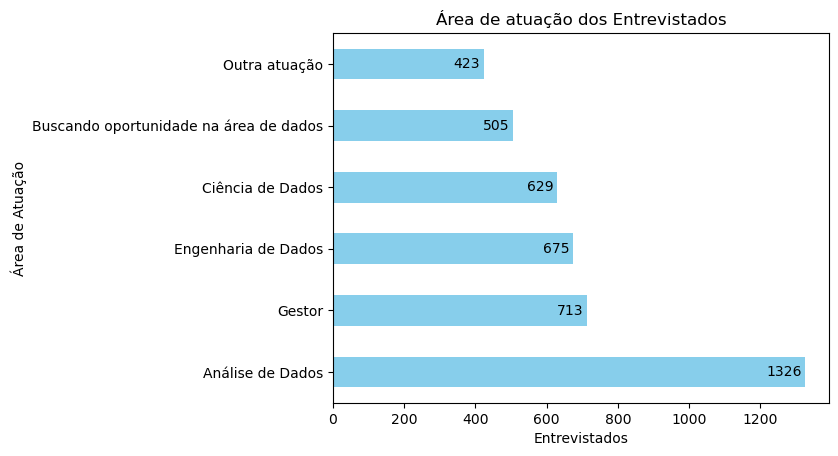

In [7]:
#CONTAGEM DOS ENTREVISTADOS DE ACORDO COM A ÁREA DE ATUAÇÃO DENTRO DAS EMPRESAS QUE TRABALHAM

contagem_atuacao = data_parte4['P4_a_1 _Atuacao'].value_counts()

contagem_atuacao.plot(kind='barh', color='skyblue')
plt.title('Área de atuação dos Entrevistados')
plt.xlabel('Entrevistados')
plt.ylabel('Área de Atuação')

for i, v in enumerate(contagem_atuacao):
    plt.text(v - 10, i, str(v), ha='right', va='center', fontsize=10)


plt.show()

In [9]:
categoria_alvo = 'Análise de Dados'
if categoria_alvo in contagem_atuacao:
    entrevistados_analise_dados = contagem_atuacao.get(categoria_alvo)
    diferenca = {}

    # Calcule a diferença percentual da categoria 'Análise de Dados' em relação às outras categorias
    for categoria, contagem in contagem_atuacao.items():
        if categoria != categoria_alvo:
            diferenca_percentual = ((entrevistados_analise_dados - contagem) / entrevistados_analise_dados) * 100
            diferenca_info = f'{abs(diferenca_percentual):.2f}% {"maior" if diferenca_percentual > 0 else "menor"}'

            diferenca[categoria] = diferenca_info

    # Exibir as diferenças em formato de texto
    for categoria, info in diferenca.items():
        print(f'{categoria_alvo} / {categoria} - {info}')
else:
    print(f'A categoria "{categoria_alvo}" não está presente na coluna.')

Análise de Dados / Gestor - 46.23% maior
Análise de Dados / Engenharia de Dados - 49.10% maior
Análise de Dados / Ciência de Dados - 52.56% maior
Análise de Dados / Buscando oportunidade na área de dados - 61.92% maior
Análise de Dados / Outra atuação - 68.10% maior


Insight: Análise de dados está muito acima em comparação com todas as categorias. Essa categoria contempla analistas de BI e nesse sentido, podemos ter algum tipo de nivelamento. 

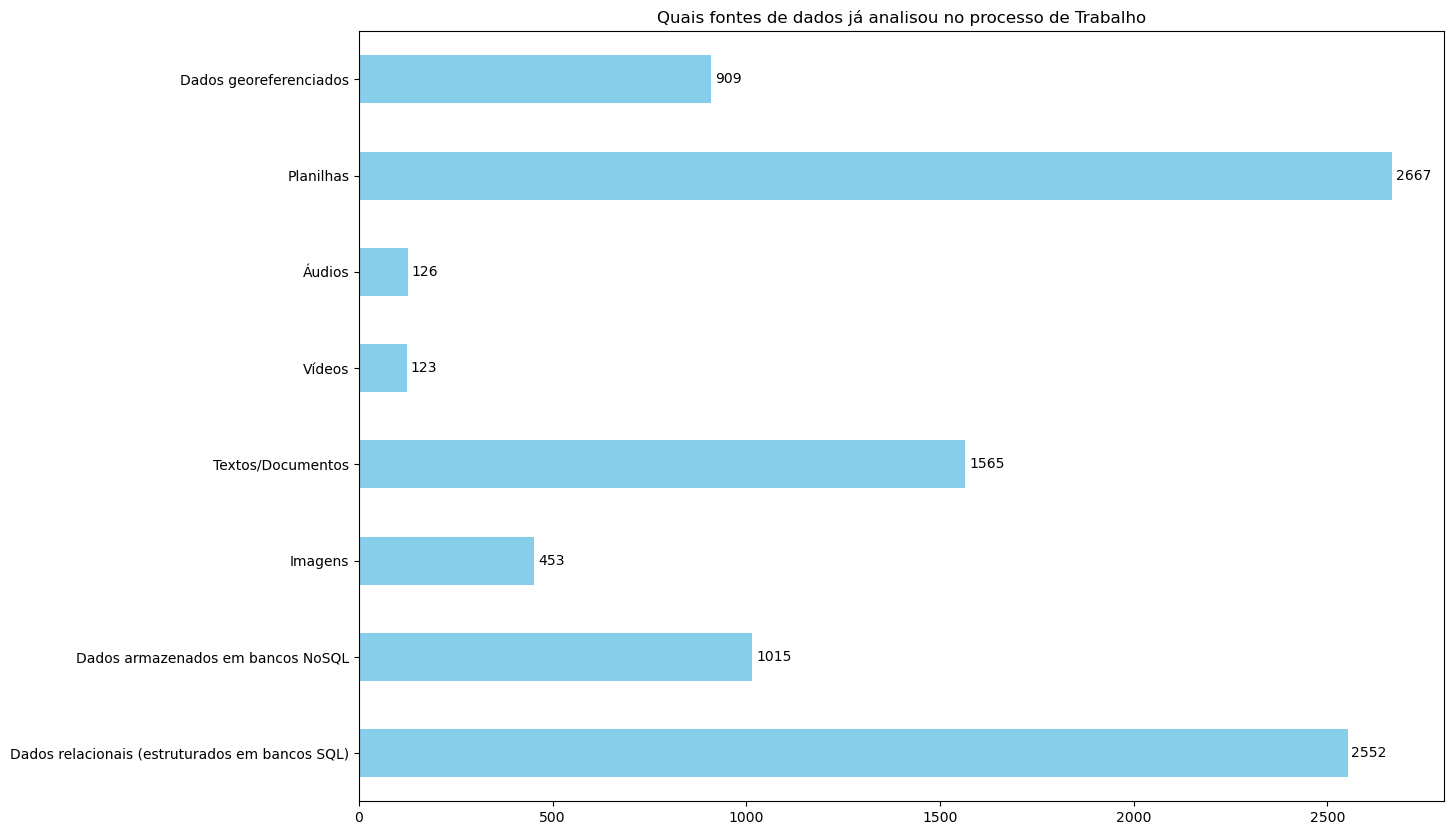

In [39]:
#SOMANDO A FONTE DE DADOS QUE OS ENTREVISTADOS TRABALHAM

selecao = data_parte4.iloc[:, 4:12]
selecao = selecao.replace("NaN", np.nan)
selecao = selecao.rename(columns=lambda x: x[8:] if isinstance(x, str) else x)

soma_valores_1 = selecao.astype(float).sum()

# Criar um gráfico de barras

plt.figure(figsize=(14, 10))
soma_valores_1.plot(kind='barh', color='skyblue')
plt.title('Quais fontes de dados já analisou no processo de Trabalho')

for i, v in enumerate(soma_valores_1):
    formatted_value = int(v) if v.is_integer() else round(v, 2)
    plt.text(v + 10, i, str(formatted_value), ha='left', va='center', fontsize=10)

plt.show()

Insight: Os profissionais em sua grande maioria analisam dados de planilhas ou dados relacionais em bancos SQL

In [9]:
for idx, coluna in enumerate(data_parte4.columns):
    (print('{} - coluna: {}'.format(idx,coluna)))
    

0 - coluna: P0_id
1 - coluna: P4_a _Mesmo que esse não seja seu cargo formal_você considera que sua atuação no dia a dia_reflete alguma das opções listadas abaixo?
2 - coluna: P4_a_1 _Atuacao
3 - coluna: P4_b _Quais das fontes de dados listadas você já analisou ou processou no trabalho?
4 - coluna: P4_b_1 _Dados relacionais (estruturados em bancos SQL)
5 - coluna: P4_b_2 _Dados armazenados em bancos NoSQL
6 - coluna: P4_b_3 _Imagens
7 - coluna: P4_b_4 _Textos/Documentos
8 - coluna: P4_b_5 _Vídeos
9 - coluna: P4_b_6 _Áudios
10 - coluna: P4_b_7 _Planilhas
11 - coluna: P4_b_8 _Dados georeferenciados
12 - coluna: P4_c _Entre as fontes de dados listadas_quais você utiliza na maior parte do tempo?
13 - coluna: P4_c_1 _Dados relacionais (estruturados em bancos SQL)
14 - coluna: P4_c_2 _Dados armazenados em bancos NoSQL
15 - coluna: P4_c_3 _Imagens
16 - coluna: P4_c_4 _Textos/Documentos
17 - coluna: P4_c_5 _Vídeos
18 - coluna: P4_c_6 _Áudios
19 - coluna: P4_c_7 _Planilhas
20 - coluna: P4_c_8 _

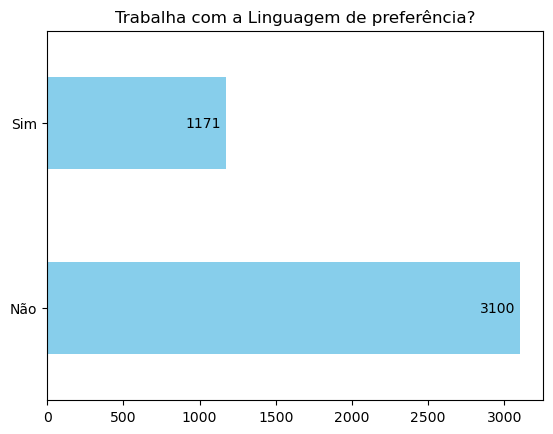

In [33]:
#COMPARAÇÃO DE PREFERÊNCIA CONTRA FERRAMENTA UTILIZADA
selecao = data_parte4.iloc[:, 36:38]
selecao = selecao.replace("NaN", np.nan)

coluna_1 = selecao['P4_e _Entre as linguagens listadas abaixo_qual é a que você mais utiliza no trabalho?']
coluna_2 = selecao['P4_f _Entre as linguagens listadas abaixo_qual é a sua preferida?']

selecao['preferencia'] = coluna_1 == coluna_2

selecao['preferencia'] = selecao['preferencia'].map({True: 'Sim', False: 'Não'})

preferencia = selecao['preferencia'].value_counts()

preferencia.plot(kind='barh', color='skyblue')
plt.title('Trabalha com a Linguagem de preferência?')

for i, v in enumerate(preferencia):
    plt.text(v - 30, i, str(v), ha='right', va='center', fontsize=10)

plt.show()



Insight: Maioria dos entrevistados analisados não trabalha com a linguagem de preferência

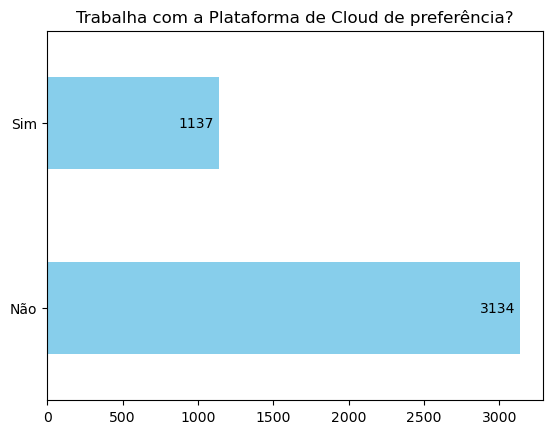

In [35]:
#COMPARAÇÃO DE PREFERÊNCIA CONTRA FERRAMENTA UTILIZADA
selecao = data_parte4.iloc[:, 72:74]
selecao = selecao.replace("NaN", np.nan)

coluna_1 = selecao['P4_g _Quais das opções de Cloud listadas abaixo você utiliza no trabalho?']
coluna_2 = selecao['P4_h _Dentre as opções listadas_qual sua Cloud preferida?']

selecao['preferencia'] = coluna_1 == coluna_2

selecao['preferencia'] = selecao['preferencia'].map({True: 'Sim', False: 'Não'})

preferencia = selecao['preferencia'].value_counts()

preferencia.plot(kind='barh', color='skyblue')
plt.title('Trabalha com a Plataforma de Cloud de preferência?')

for i, v in enumerate(preferencia):
    plt.text(v - 30, i, str(v), ha='right', va='center', fontsize=10)

plt.show()

Insight: Maioria dos entrevistados não trabalha com a Plataforma de Cloud de preferência